<h1>Linear Regression </h1>
<p>
Trying to fit 2D straight Line to data using Gradient Descent Algorithm

<h3> Gradient Descent Algorithm </h3>
<p>
We start with assumpution equation (Called hypothesis) which can fit above data points.   
<p>
$h(x) = w_0 + w_1 x$
</p> 
The two coefficients with initial guess (i.e. $w_0$ and $w_1$) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.

<p>
 Our objective is to minimize Loss.
    <p>
 $ L(W)=   \hat{Y}-Y$  Where  $\hat{Y}=h(X)$
 </p>
Since Loss can negative or postive, we need to minimize the absolute values ( OR Mean squared) Loss so we define Loss/Cost function as follows

<h3>Cost/Loss Function</h3>
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$L(W) = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left ( \hat{Y}_{i}- Y_{i} \right)^2$
<p>
$L(w_0, w_1)  = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left (h(x_{i}) - y_{i} \right)^2$

This Loss/cost function is also called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$  term.

We minimize Loss by taking the derivative (the tangential line to a function) of our cost/loss function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost/loss function in the direction with the steepest descent. The size of each step is determined by the parameter α($alpha$), which is called the learning rate. The direction in which the step is taken is determined by the partial derivative of $L(w_0,w_1)$. 

The gradient descent algorithm is:

repeat until convergence:<p>
{<p>
&nbsp;&nbsp;    $w_0 := w_0 - \alpha \frac{\partial}{\partial w_0} L(w_0, w_1) $<p>
&nbsp;&nbsp;    $w_1 := w_1 - \alpha \frac{\partial}{\partial w_1} L(w_0, w_1) $<p>
}

OR<p>
$\begin{align*} \text{repeat until convergence: } \lbrace & \newline w_0 := & w_0 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(h_w(x_{i}) - y_{i}) \newline w_1 := & w_1 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}\left((h_w(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}$

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


<H1>Read Data from CSV

In [3]:
dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset
dfTest = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')   #Test Dataset
dfValid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv') #Validation Dataset
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

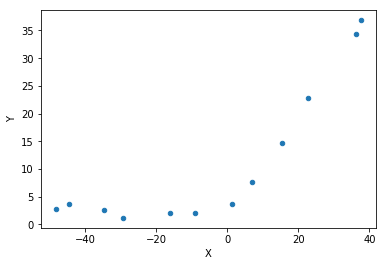

In [4]:
dfTrain.plot(x='X',y='Y',kind='scatter')

<h2>Extract Input Feature to <b>X </b>and Label to <b>y</b>

In [5]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:1]
    df_Label=df.iloc[:,1:2]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [6]:
X,Y=extractFeatures(dfTrain)

<h5> Add Bias to Input Features X

In [7]:
def addBiasFeature(X):
    inputX=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    return inputX

In [8]:
inputX=addBiasFeature(X)

<h1>Training

<h5> Initialization

In [9]:
batchSize=len(Y)         #no of Examples in batch
iterations = 5000
alpha = 0.001
lossList=np.zeros((iterations,1),dtype=float)  #for plotting loss curve
featureCount=inputX.shape[1]   #no of features + 1 (after added bias term)
weights=np.zeros((featureCount, 1)) #initialize Weight Paramters


<h5> Gradient Descent Updates

In [10]:

for k in range(iterations):
    #Hypothesis
    hypothesis=np.matmul( inputX,weights)           
    
    #Loss
    loss=hypothesis-Y  
    
    
    # derivative
    dW=np.matmul(inputX.T,loss)  #Derivative
   
    
    #gradient Update
    weights=weights - (alpha/batchSize)*dW              
    
    #Compute Loss for Plotting
    newLoss=np.matmul( inputX,weights)-Y
    newLossSqr=np.multiply(newLoss,newLoss)
    lossList[k]=(1.0/(2.0*batchSize))* np.sum(newLossSqr)



<h1>Plot Loss

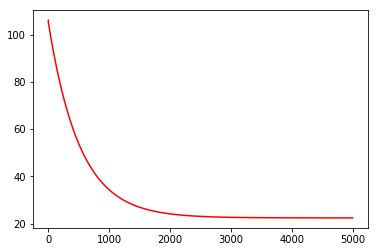

In [11]:
plt.plot(lossList,color='r')

# Prediction

In [12]:
def predict(X,weights):
    inputX=addBiasFeature(X)
    pY=np.matmul(inputX, weights)
    return pY

# RMSE Evaluation

In [13]:
def getRMSE(aY,pY):
    Error=aY- pY
    ErrorSqr=Error**2
    MSE=ErrorSqr.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

<h5>RMSE on Training Data

In [14]:
X,Y=extractFeatures(dfTrain)
pY=predict(X, weights)  # Predict with bias feature added
print(getRMSE(Y, pY))

6.690141724522904


<h5> RMSE on Validation Data

In [15]:
vX,vY=extractFeatures(dfValid)
pY=predict(vX, weights)  # Predict with bias feature added
print(getRMSE(vY, pY))

7.674945214919805


<h5> RMSE on Test Data

In [16]:
tX,tY=extractFeatures(dfTest)
pY=predict(tX, weights)  # Predict with bias feature added
print(getRMSE(tY, pY))

8.090578649877665


<h1>Plotting Hypothesis

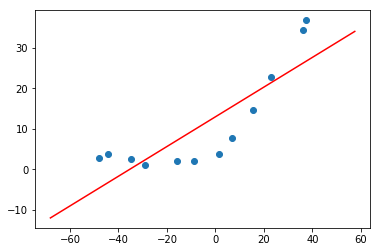

In [18]:
x_min, x_max = X[:, 0].min() - 20, X[:, 0].max() + 20
lineX = np.linspace(x_min, x_max, 100)
lineX.shape=(len(lineX),1) 
lineY=predict(lineX, weights)  # Predict with bias feature added
plt.scatter(X,Y)
plt.plot(lineX, lineY,color='r')
plt.show()